In [1]:
import sys
import os

# Get the parent directory (main repository directory)
parent_dir = os.path.abspath("..")
sys.path.append(parent_dir)

import sys
print(sys.path)

['/fs01/home/aditima/environment_project/SAT_SAM/example', '/pkgs/python-3.9.10/lib/python39.zip', '/pkgs/python-3.9.10/lib/python3.9', '/pkgs/python-3.9.10/lib/python3.9/lib-dynload', '', '/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages', '/fs01/home/aditima/environment_project/SAT_SAM']


# SegMate Demo Notebook

Welcome to the SegMate demo notebook for ODISE (Open-Vocabulary Panoptic Segmentation with Text-to-Image Diffusion Models)! In this notebook, we will showcase the capabilities of SegMate, a Segment Model Toolkit developed by AI Engineering team at Vector Institute. This notebook will focus on showing the capabilities of ODISE as part of the SegMate toolkit. 

In [5]:
# Imports
from segmate.segmenter import ODISE
from segmate import utils
import numpy as np
import torch
from PIL import Image

### Initializing SegMate
To start using SegMate, we need to create an instance of the ODISE class. Here, we create an instance called sm with `device` specifying the device to run the model on. In this case, we are using the cuda device for GPU acceleration.

Let's create the instance and load the model:

In [3]:
sm = ODISE(device='cuda')

No module 'xformers'. Proceeding without it.
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.


Finished Loading Model


You can input more classes (seperated by a semi-colon) in the `vocab` variable. The expected format is `"a1, a2; b1, b2"`, where a1, a2 are synonyms for one class. The first word is displayed as the class name.

`label_list` contains the pre-defiend categories to use. Options are `"COCO"` (133 categories), `"ADE"` (150 categories), and `"LVIS"` (1203 categories)

Here is an example of just using the pre-defined categories. 

/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from No

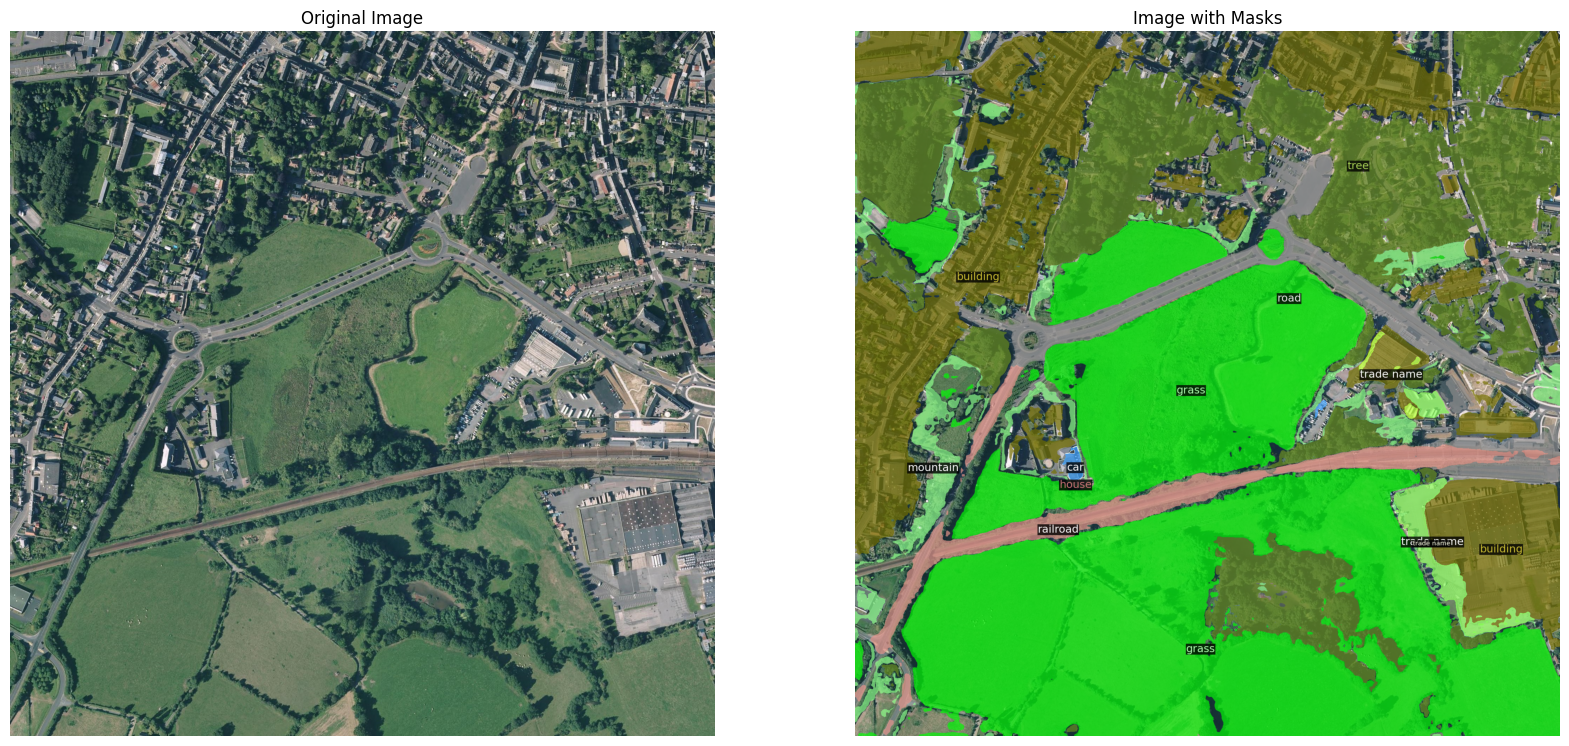

In [18]:
vocab = ""
label_list = ["COCO", "ADE"]

input_image = Image.open("./images/map2.jpg")
result = sm.segment(np.array(input_image), vocab, label_list)
utils.visualize_automask(image=np.array(input_image), masks=np.array(result), mask_only = False)

This example only looks at roads. 

/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from No

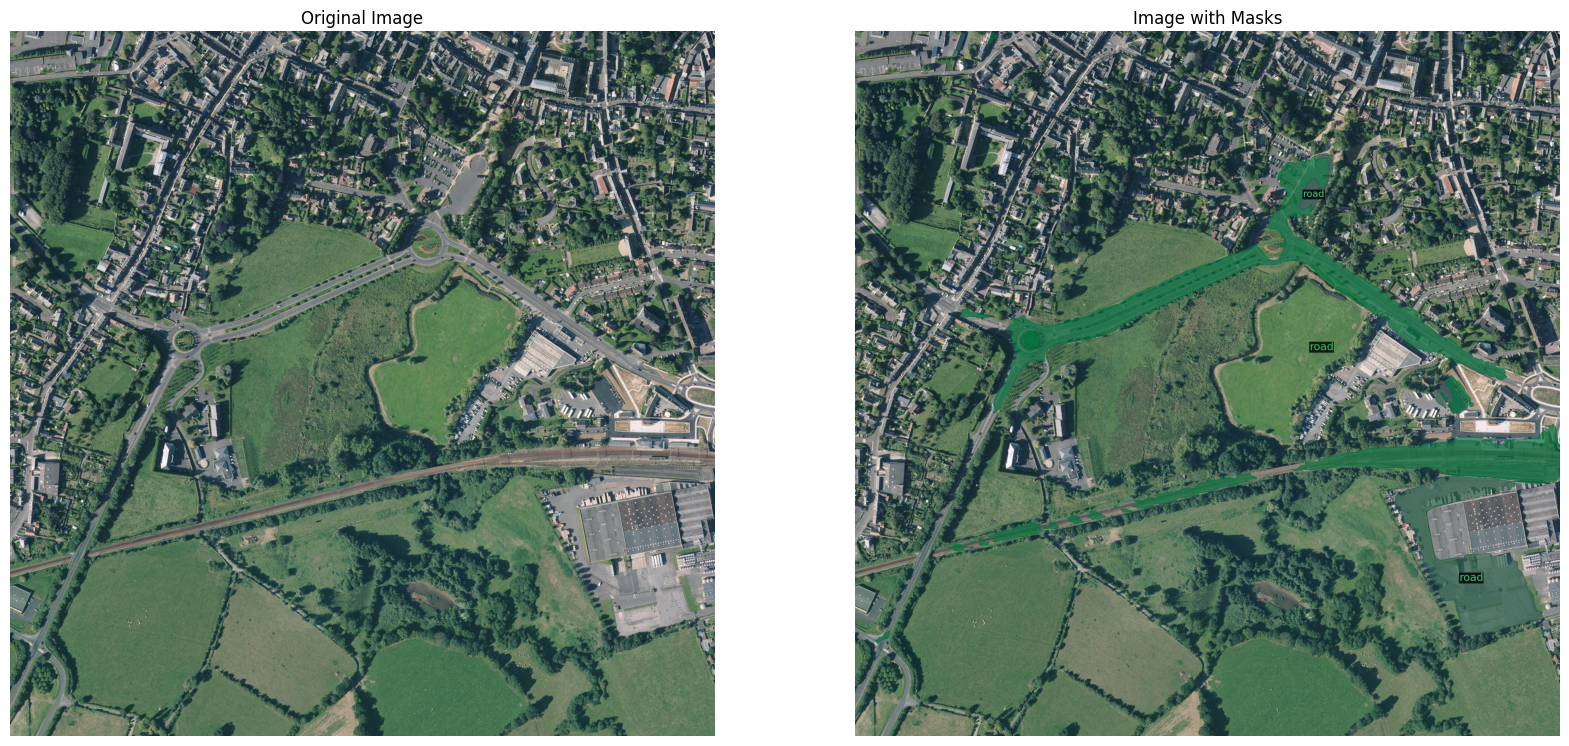

In [19]:
vocab = "road"
label_list = ["", ""]

input_image = Image.open("./images/map2.jpg")
result = sm.segment(np.array(input_image), vocab, label_list)
utils.visualize_automask(image=np.array(input_image), masks=np.array(result), mask_only = False)

/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from No

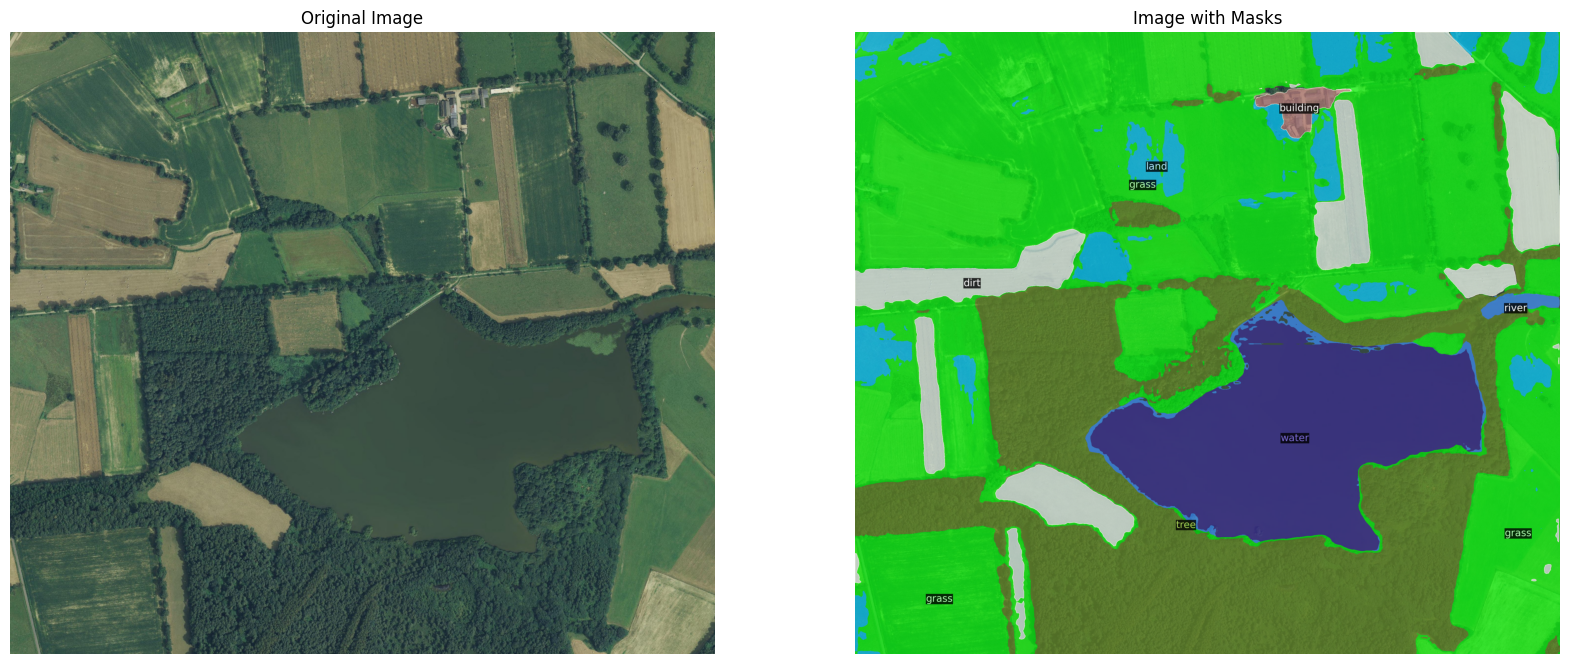

In [20]:
vocab = ""
label_list = ["COCO", "ADE"]

input_image = Image.open("./images/map3.jpg")
result = sm.segment(np.array(input_image), vocab, label_list)
utils.visualize_automask(image=np.array(input_image), masks=np.array(result), mask_only = False)